In [401]:
import random
import numpy as np
import pandas as pd

In [402]:
def normalize_theta(theta):
    # Chuẩn hóa sao cho tổng bằng 1
    return theta / np.sum(theta)

In [403]:
df = pd.read_csv('../export.csv')
filtered_df = df[df['label'] == 1]
X = filtered_df[['x11', 'x12', 'x21', 'x22', 'x23', 'x24', 'x31', 'x32', 'x41', 'x42', 'x43', 'x51', 'x52', 'x61', 'x71', 'x72']].values
y = filtered_df['label'].values 

In [404]:
def foo(theta):
    # arr = np.array(
    #     [[300, 300, 690, 690, 690, 690, 300, 300, 628, 850, 850, 0, 0, 300, 300, 690],
    #     [300, 300, 690, 690, 690, 690, 300, 300, 628, 850, 850, 0, 0, 300, 300, 690]]
    # )
    return np.dot(X, theta)


def fitness(theta):
    target_value = 500  # Giá trị mục tiêu
    lower_bound = 300
    upper_bound = 580

    normalized_theta = normalize_theta(theta)

    ans = foo(normalized_theta)
    # # if ans == target_value:
    # #     return 9999
    # # # el
    # if lower_bound <= ans <= upper_bound:
    #     return 99999
    # else:
    #     return abs(1 / (ans - target_value))
    for row in ans:
        if not (lower_bound <= row <= upper_bound).all():
            return abs(1 / (ans.mean() - target_value))

    return 99999

In [405]:
def generate_initial_solutions(num_solutions, num_params):
    solutions = []
    for _ in range(num_solutions):
        solution = np.random.rand(num_params)
        solutions.append(tuple(solution))
    return solutions

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child = list(parent1[:crossover_point]) + list(parent2[crossover_point:])
    return tuple(child)

def mutate(child, mutation_rate):
    mutated_child = tuple([gene * random.uniform(1 - mutation_rate, 1 + mutation_rate) for gene in child])
    return mutated_child

In [406]:
# Số lượng tham số
num_params = 16

# Số lượng giải pháp và thế hệ
num_solutions = 1000
num_generations = 1000

# Tạo thế hệ ban đầu
solutions = generate_initial_solutions(num_solutions, num_params)


In [407]:
for generation_id in range(num_generations):
    rankedsolutions = [(fitness(s), s) for s in solutions]
    rankedsolutions.sort(reverse=True)

    print(f"=== Gen {generation_id} best solutions ===")
    print(rankedsolutions[0])  # Tìm giải pháp tốt nhất

    if rankedsolutions[0][0] > 9999:
        break

    bestSolutions = rankedsolutions[:100]
    elements = np.concatenate([np.array(s[1]) for s in bestSolutions])
    newGen = []

    for _ in range(len(solutions)):
        # Crossover
        parent1, parent2 = random.choice(bestSolutions)[1], random.choice(bestSolutions)[1]
        child = crossover(parent1, parent2)

        # Mutation
        mutated_child = mutate(child, mutation_rate=0.01)

        # Chuẩn hóa tổng của mutated_child để bằng 1
        normalized_mutated_child = normalize_theta(mutated_child)

        newGen.append(normalized_mutated_child)

    solutions = newGen

=== Gen 0 best solutions ===
(6.63682511235788, (0.39360475126889416, 0.519023733518679, 0.10610538503909483, 0.11307595427708006, 0.8897003620132974, 0.46043865163929176, 0.31374619931389025, 0.7394784922873459, 0.8153543158250972, 0.8120536165625312, 0.6145264951469372, 0.5417042681060233, 0.35958076959103247, 0.26126936428395353, 0.44333873305685956, 0.11254330977942562))
=== Gen 1 best solutions ===
(95.80281723597415, array([0.02099052, 0.01354701, 0.11311502, 0.03816743, 0.06827822,
       0.08755834, 0.02033466, 0.06472915, 0.09560716, 0.08224034,
       0.02171617, 0.04572653, 0.12040077, 0.0440806 , 0.06656109,
       0.09694698]))
=== Gen 2 best solutions ===
(381.45339630321496, array([0.02016928, 0.04877578, 0.05332007, 0.02585832, 0.10318165,
       0.05825122, 0.10516972, 0.03893204, 0.09466738, 0.09643899,
       0.00369027, 0.01174356, 0.07801454, 0.05895507, 0.09767347,
       0.10515864]))
=== Gen 3 best solutions ===
(90.2025362321244, array([0.04683425, 0.08564687, 

In [408]:
theta = normalize_theta(solutions[0])

In [409]:
theta = theta.reshape(-1, 1)
print(theta)

[[0.06162281]
 [0.0270689 ]
 [0.07369409]
 [0.05721515]
 [0.10542227]
 [0.11251242]
 [0.01809568]
 [0.01576472]
 [0.11488051]
 [0.03693917]
 [0.08531804]
 [0.10232206]
 [0.05755926]
 [0.05835274]
 [0.02759416]
 [0.04563802]]


In [410]:
def calculate_features(sub_features):
    sum = sub_features.sum()
    b = (1/sum)*sub_features
    a = sub_features[0]/b[0]
    return(a , b )

In [411]:
ab1 = theta[0:2]
ab2 = theta[2:6]
ab3 = theta[6:8]
ab4 = theta[8:11]
ab5 = theta[11:13]
ab6 = theta[13:14]
ab7 = theta[14:16]
ab_all = [ab1, ab2, ab3, ab4, ab5, ab6, ab7]
final_a = []
final_b = []
for ab in ab_all:
    a, b = calculate_features(ab)
    final_a.append(a)
    final_b.append(b)
    # print(calculate_features(ab))
final_b[4][-1]= -final_b[4][-1] 
final_a = final_a/np.array(final_a).sum()

In [412]:
def fn_combined_features(features):
    combined = []
    for items in features:
        tmp = []
        for index, item in enumerate(items):
            for _ in item:
                tmp.append(_)
        combined.append(tmp)
    return np.array(combined)

In [413]:
def about(value, _min=300, _max=850):
    if value < _min:
        value = _min
    elif value > _max:
        value = _max
    return int(value) 

In [414]:
final_b

[array([[0.69479787],
        [0.30520213]]),
 array([[0.21125233],
        [0.16401362],
        [0.30220468],
        [0.32252938]]),
 array([[0.53442018],
        [0.46557982]]),
 array([[0.48444638],
        [0.15577096],
        [0.35978266]]),
 array([[ 0.63998758],
        [-0.36001242]]),
 array([[1.]]),
 array([[0.37680377],
        [0.62319623]])]

In [415]:
final_b = fn_combined_features(final_b)

C:\Users\Dao Trong Hoan\AppData\Local\Temp\ipykernel_832\2614134860.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(combined)


In [416]:
from collections import defaultdict
count = defaultdict(int)

def check_acc(label, score):
    if label == 1:
        if score >= 300 and score <= 580:
            return True
        else:
            return False
    if label == 2:
        if score > 580 and score <= 670:
            return True
        else:
            return False
    if label == 3:
        if score > 670 and score <= 740:
            return True
        else:
            return False
    if label == 4:
        if score > 740 and score <= 800:
            return True
        else:
            return False
    if label == 5:
        if score > 800 and score <= 850:
            return True
        else:
            return False


In [417]:
def evaluate(matrices, y):
    list_score = []
    for i in range(len(matrices)):
        matric = matrices[i]
        # print(final_a[0] * np.dot(final_b[0], matric[0:2]), final_a[1] * np.dot(final_b[1], matric[2:6]), final_a[2] * np.dot(final_b[2], matric[6:8]), final_a[3] * np.dot(final_b[3], matric[8:11]), final_a[4] * about(np.dot(final_b[4], matric[11:13])), final_a[5] * np.dot(final_b[5], matric[13:14]), final_a[6] * np.dot(final_b[6], matric[14:16]))
        score = (
            final_a[0] * np.dot(final_b[0], matric[0:2])
            + final_a[1] * np.dot(final_b[1], matric[2:6])
            + final_a[2] * np.dot(final_b[2], matric[6:8])
            + final_a[3] * np.dot(final_b[3], matric[8:11])
            + final_a[4] * about(np.dot(final_b[4], matric[11:13]))
            + final_a[5] * np.dot(final_b[5], matric[13:14])
            + final_a[6] * np.dot(final_b[6], matric[14:16])
        )
        if check_acc(y[i], score):
            count[y[i]] += 1

In [418]:
evaluate(X,y)
theta

array([[0.06162281],
       [0.0270689 ],
       [0.07369409],
       [0.05721515],
       [0.10542227],
       [0.11251242],
       [0.01809568],
       [0.01576472],
       [0.11488051],
       [0.03693917],
       [0.08531804],
       [0.10232206],
       [0.05755926],
       [0.05835274],
       [0.02759416],
       [0.04563802]])

In [419]:
count_label = {}
# Đếm số lần xuất hiện của mỗi label trong y
for label in y:
    if label in count_label:
        count_label[label] += 1
    else:
        count_label[label] = 1

# In từ điển count_label

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (4).

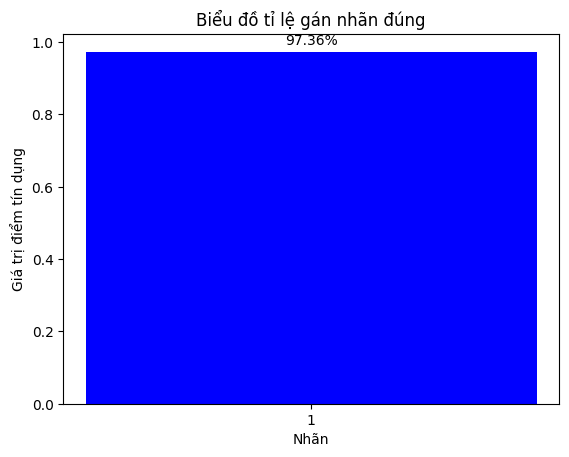

In [420]:
import matplotlib.pyplot as plt

label_name = ['label_1', 'label_2', 'label_4', 'label_5']
accuracy_list = [count[tmp]/count_label[tmp] for tmp in count_label]

# Tạo danh sách chỉ số từ 1 đến độ dài của mảng
indices = list(range(1, len(accuracy_list) + 1))

# Vẽ biểu đồ cột
plt.bar(indices, accuracy_list, color='blue')

plt.title('Biểu đồ tỉ lệ gán nhãn đúng')
plt.xlabel('Nhãn')
plt.ylabel('Giá trị điểm tín dụng')

# Hiển thị giá trị trực tiếp trên đỉnh của mỗi cột với tên nhãn
for i, v in enumerate(accuracy_list):
    plt.text(i + 1, v + 0.01, f'\n{v*100:.2f}%', ha='center', va='bottom', color='black')

# Đặt nhãn trục x
plt.xticks(indices, label_name)

plt.grid(True)
plt.show()
